In [944]:
!pip install pycaret
import pandas as pd  #for data frames
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [945]:
data = pd.read_excel('Train.xlsx')#Train Data
test_data = pd.read_excel('Test.xlsx')#Test Data 

In [946]:
#import modules
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
%matplotlib inline

In [947]:
test_data.isna().sum()# There are null values in test data

Index            0
BI_RADS          0
Age             12
Shape            1
Margin           1
Mass_Density     0
Severity         0
dtype: int64

In [948]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         811 non-null    int64  
 1   BI_RADS       809 non-null    float64
 2   Age           723 non-null    float64
 3   Shape         781 non-null    object 
 4   Margin        764 non-null    object 
 5   Mass_Density  735 non-null    object 
 6   Severity      811 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 44.5+ KB


In [949]:
data.isna().sum() #There are null values for the features

Index            0
BI_RADS          2
Age             88
Shape           30
Margin          47
Mass_Density    76
Severity         0
dtype: int64

In [950]:
data['BI_RADS'].describe() #Individual feature Analysis

count    809.000000
mean       4.379481
std        1.914800
min        0.000000
25%        4.000000
50%        4.000000
75%        5.000000
max       55.000000
Name: BI_RADS, dtype: float64

In [951]:
data[data['BI_RADS'].isnull()] 

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
20,21,NaN,66.0,NaN,NaN,high,1
208,209,NaN,52.0,irregular,ill-defined,low,0


In [952]:
#replacing the null value with the mean of similar feature values present in the dataset
data.loc[(data['Shape'] == 'irregular') & (data['Margin'] == 'ill-defined') & (data['Mass_Density'] == 'low')].mean()

Index       407.140845
BI_RADS       4.602837
Age          62.574803
Severity      0.753521
dtype: float64

In [953]:
data.loc[208, 'BI_RADS'] = 5 #got a mean 4.6 replaced with the ceil of the value

In [954]:
data['BI_RADS'].fillna(data['BI_RADS'].mode()[0], inplace = True) #replaced other value with the mode

In [955]:
data.loc[(data['BI_RADS'] > 5) | (data['BI_RADS'] == 0)] #As BI_RADS range is [1,5]

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
340,341,55.0,46.0,irregular,obscured,low,1
456,457,0.0,69.0,irregular,spiculated,low,1
533,534,0.0,NaN,irregular,ill-defined,low,0
550,551,6.0,80.0,irregular,spiculated,low,1
664,665,6.0,60.0,lobular,spiculated,low,1
692,693,6.0,51.0,irregular,ill-defined,low,1
707,708,6.0,41.0,oval,circumscribed,low,0
717,718,6.0,71.0,irregular,ill-defined,low,1
718,719,6.0,68.0,irregular,obscured,low,1
745,746,6.0,76.0,lobular,NaN,low,0


In [956]:
data['BI_RADS'] = data['BI_RADS'].apply(lambda x : 5 if x > 5 else x) #replacing greater than 5 values to 5

In [957]:
data['BI_RADS'] = data['BI_RADS'].apply(lambda x : 1 if x == 0 else x) #replacing zero values to 1

In [958]:
data['BI_RADS'].describe()

count    811.000000
mean       4.311961
std        0.663022
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: BI_RADS, dtype: float64

In [959]:
data['Age'].describe() #Individual feature Analysis

count    723.000000
mean      55.887967
std       16.886616
min        5.000000
25%       45.000000
50%       56.000000
75%       66.000000
max      130.000000
Name: Age, dtype: float64

In [960]:
data[data['Age'].isnull()] #There are null values

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
25,26,5.0,NaN,irregular,spiculated,low,1
27,28,5.0,NaN,lobular,NaN,low,0
50,51,4.0,NaN,oval,circumscribed,iso,0
71,72,5.0,NaN,irregular,obscured,low,1
72,73,5.0,NaN,irregular,spiculated,low,0
...,...,...,...,...,...,...,...
768,769,4.0,NaN,irregular,spiculated,low,0
769,770,5.0,NaN,oval,ill-defined,low,1
797,798,5.0,NaN,irregular,ill-defined,low,1
803,804,4.0,NaN,oval,circumscribed,low,0


In [961]:
data[data['Age'] > 90] # There are People with age 130 

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
119,120,5.0,130.0,irregular,spiculated,low,0
132,133,5.0,130.0,irregular,ill-defined,low,0
169,170,5.0,130.0,irregular,spiculated,low,1
195,196,5.0,130.0,irregular,ill-defined,low,1
330,331,5.0,130.0,lobular,spiculated,low,1
466,467,5.0,130.0,irregular,spiculated,low,1
578,579,5.0,130.0,lobular,microlobulated,low,1
596,597,5.0,130.0,irregular,obscured,low,1
609,610,5.0,130.0,lobular,ill-defined,low,1
616,617,5.0,93.0,round,spiculated,low,1


In [962]:
data['Age'] = data['Age'].apply(lambda x : 96.0 if x == 130 else x) #replacing 130 people age with max age value

In [963]:
data['Age'] = data['Age'].replace(np.NaN, data['Age'].mean()) #replacing all other nan values to mean

In [964]:
test_data[test_data['Age'].isnull()] #There are null values

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
2,3,4,NaN,oval,circumscribed,low,0
8,9,4,NaN,lobular,NaN,iso,0
12,13,4,NaN,round,circumscribed,high,1
42,43,4,NaN,irregular,spiculated,low,0
52,53,4,NaN,irregular,microlobulated,iso,1
73,74,5,NaN,irregular,ill-defined,low,1
77,78,5,NaN,irregular,obscured,low,1
112,113,5,NaN,irregular,obscured,low,1
114,115,4,NaN,oval,circumscribed,low,0
126,127,4,NaN,irregular,ill-defined,low,0


In [965]:
test_data['Age'] = test_data['Age'].apply(lambda x : 96.0 if x == 130 else x) #replacing 130 people age with max age value

In [966]:
test_data['Age'] = test_data['Age'].replace(np.NaN, test_data['Age'].mean()) #replacing all other nan values to mean

In [967]:
data['Shape'].describe()

count           781
unique            4
top       irregular
freq            340
Name: Shape, dtype: object

In [968]:
data[data['Shape'].isnull()] #Individual Shape Analysis

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
6,7,4.0,70.00000,NaN,NaN,low,0
9,10,5.0,60.00000,NaN,spiculated,high,1
20,21,4.0,66.00000,NaN,NaN,high,1
48,49,2.0,42.00000,NaN,NaN,fat-containing,0
54,55,4.0,53.00000,NaN,spiculated,low,1
74,75,5.0,70.00000,NaN,ill-defined,NaN,1
83,84,4.0,57.00000,NaN,ill-defined,high,0
128,129,4.0,52.00000,NaN,ill-defined,NaN,0
157,158,4.0,51.00000,NaN,NaN,low,0
163,164,4.0,53.00000,NaN,ill-defined,low,0


In [969]:
data['Shape'] = data['Shape'].replace(np.NaN, data['Shape'].mode()[0])  #replacing the categorical variable with mode

In [970]:
test_data['Shape'] = test_data['Shape'].replace(np.NaN, test_data['Shape'].mode()[0])  #replacing the categorical variable with mode

In [971]:
data['Margin'].describe()

count               764
unique                5
top       circumscribed
freq                298
Name: Margin, dtype: object

In [972]:
data[data['Margin'].isnull()] #Individual Margin Analysis

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
5,6,4.0,65.00000,round,NaN,low,0
6,7,4.0,70.00000,irregular,NaN,low,0
7,8,5.0,42.00000,round,NaN,low,0
12,13,4.0,64.00000,round,NaN,low,0
19,20,4.0,40.00000,round,NaN,NaN,0
20,21,4.0,66.00000,irregular,NaN,high,1
22,23,4.0,43.00000,round,NaN,NaN,0
27,28,5.0,55.46473,lobular,NaN,low,0
35,36,4.0,77.00000,lobular,NaN,NaN,0
48,49,2.0,42.00000,irregular,NaN,fat-containing,0


In [973]:
data['Margin'] = data['Margin'].replace(np.NaN, data['Margin'].mode()[0]) #replacing the categorical variable with mode

In [974]:
test_data['Margin'] = test_data['Margin'].replace(np.NaN, test_data['Margin'].mode()[0]) #replacing the categorical variable with mode

In [975]:
data['Mass_Density'].describe()

count     735
unique      4
top       low
freq      663
Name: Mass_Density, dtype: object

In [976]:
data[data['Mass_Density'].isnull()]

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
1,2,4.0,43.00000,round,circumscribed,NaN,1
4,5,5.0,74.00000,round,spiculated,NaN,1
19,20,4.0,40.00000,round,circumscribed,NaN,0
22,23,4.0,43.00000,round,circumscribed,NaN,0
26,27,2.0,66.00000,round,circumscribed,NaN,0
...,...,...,...,...,...,...,...
614,615,3.0,46.00000,irregular,spiculated,NaN,1
627,628,4.0,55.46473,oval,circumscribed,NaN,0
665,666,4.0,27.00000,oval,circumscribed,NaN,0
677,678,4.0,57.00000,irregular,ill-defined,NaN,1


In [977]:
data['Mass_Density'] = data['Mass_Density'].replace(np.NaN, data['Mass_Density'].mode()[0]) #replacing the categorical variable with mode

In [978]:
data['Severity'].describe()

count    811.000000
mean       0.459926
std        0.498699
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Severity, dtype: float64

In [979]:
data.head()

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5.0,67.0,lobular,spiculated,low,1
1,2,4.0,43.0,round,circumscribed,low,1
2,3,5.0,58.0,irregular,spiculated,low,1
3,4,4.0,28.0,round,circumscribed,low,0
4,5,5.0,74.0,round,spiculated,low,1


In [980]:
data.isna().sum() #There are none null values

Index           0
BI_RADS         0
Age             0
Shape           0
Margin          0
Mass_Density    0
Severity        0
dtype: int64

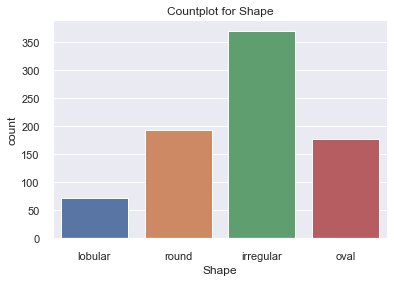

In [981]:
#count plot of each feature
sns.countplot(data['Shape'])
plt.title("Countplot for Shape")
plt.show()

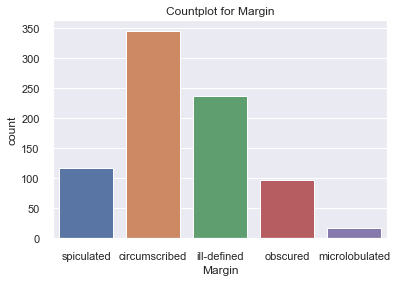

In [982]:
sns.countplot(data['Margin'])
plt.title("Countplot for Margin")
plt.show()

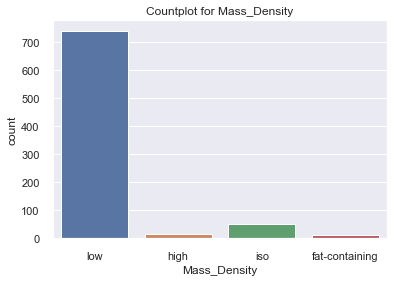

In [983]:
sns.countplot(data['Mass_Density'])
plt.title("Countplot for Mass_Density")
plt.show()

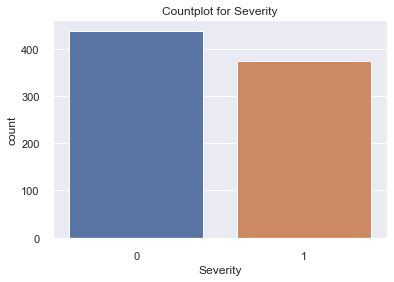

In [984]:
sns.countplot(data['Severity'])
plt.title("Countplot for Severity")
plt.show()

From the observations, There categorical feature are imbalanced

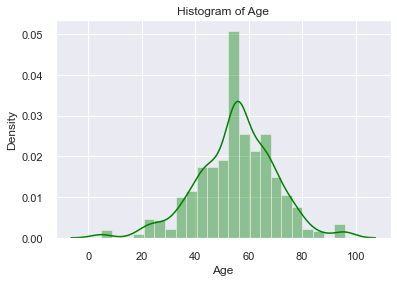

In [985]:
# Histogram
sns.distplot(data.Age, color = 'green')
plt.xlabel('Age')
plt.title('Histogram of Age')
plt.show()

Text(0.5, 1.0, 'Boxplot of Age')

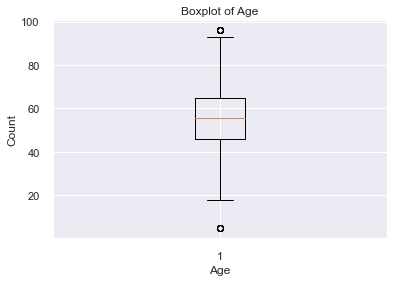

In [986]:
# Boxplot
plt.boxplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Boxplot of Age')

In [987]:
# Outliers Count
IQR3 = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
IQR3

19.0

In [988]:
UL3 = data['Age'].quantile(0.75) + (1.5*IQR3)
UL3

93.5

In [989]:
data.Age[(data.Age > UL3)].value_counts().sum()

10

In [990]:
data.Age = np.where(data.Age > UL3, UL3, data.Age)

In [991]:
data.Age[(data.Age > UL3)].value_counts().sum()

0

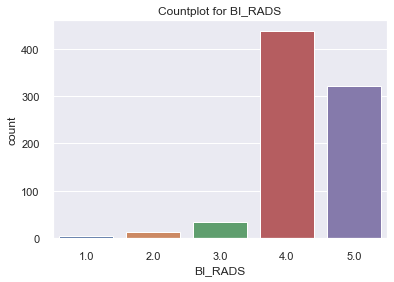

In [992]:
sns.countplot(data['BI_RADS'])
plt.title("Countplot for BI_RADS")
plt.show()

In [993]:
data.duplicated().sum()

0

Label Encoding using map

In [994]:
data['Shape'].unique()

array(['lobular', 'round', 'irregular', 'oval'], dtype=object)

In [995]:
data.Shape = data['Shape'].map({
                    'round' : 1,
                    'oval'  : 2,
                    'lobular':3,
                    'irregular':4
})

In [996]:
test_data.Shape = test_data['Shape'].map({
                    'round' : 1,
                    'oval'  : 2,
                    'lobular':3,
                    'irregular':4
})

In [997]:
data.isna().sum()

Index           0
BI_RADS         0
Age             0
Shape           0
Margin          0
Mass_Density    0
Severity        0
dtype: int64

In [998]:
data['Margin'].unique()

array(['spiculated', 'circumscribed', 'ill-defined', 'obscured',
       'microlobulated'], dtype=object)

In [999]:
data.Margin = data['Margin'].map({
                    'circumscribed' : 1,
                    'microlobulated'  : 2,
                    'obscured':3,
                    'ill-defined':4,
                    'spiculated' :5
})

In [1000]:
test_data.Margin = test_data['Margin'].map({
                    'circumscribed' : 1,
                    'microlobulated'  : 2,
                    'obscured':3,
                    'ill-defined':4,
                    'spiculated' :5
})

In [1001]:
data.isna().sum()

Index           0
BI_RADS         0
Age             0
Shape           0
Margin          0
Mass_Density    0
Severity        0
dtype: int64

In [1002]:
data['Mass_Density'].unique()

array(['low', 'high', 'iso', 'fat-containing'], dtype=object)

In [1003]:
data.Mass_Density = data['Mass_Density'].map({
                    'high' : 1,
                    'iso'  : 2,
                    'low':3,
                    'fat-containing':4,
})

In [1004]:
test_data.Mass_Density = test_data['Mass_Density'].map({
                    'high' : 1,
                    'iso'  : 2,
                    'low':3,
                    'fat-containing':4,
})

In [1005]:
data = data.drop('Index',axis = 1) #dropping the index column

In [1006]:
test_data = test_data.drop('Index',axis =1)

There is relationship with Age, BI_RADS with the Severity. As Age, BI_RADS increases the severity is malignant

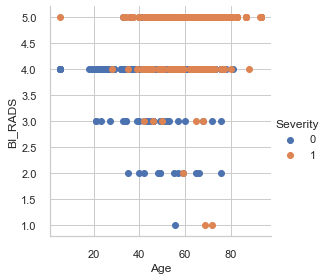

In [1007]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="Severity", size=4) \
   .map(plt.scatter, "Age", "BI_RADS") \
   .add_legend();
plt.show();

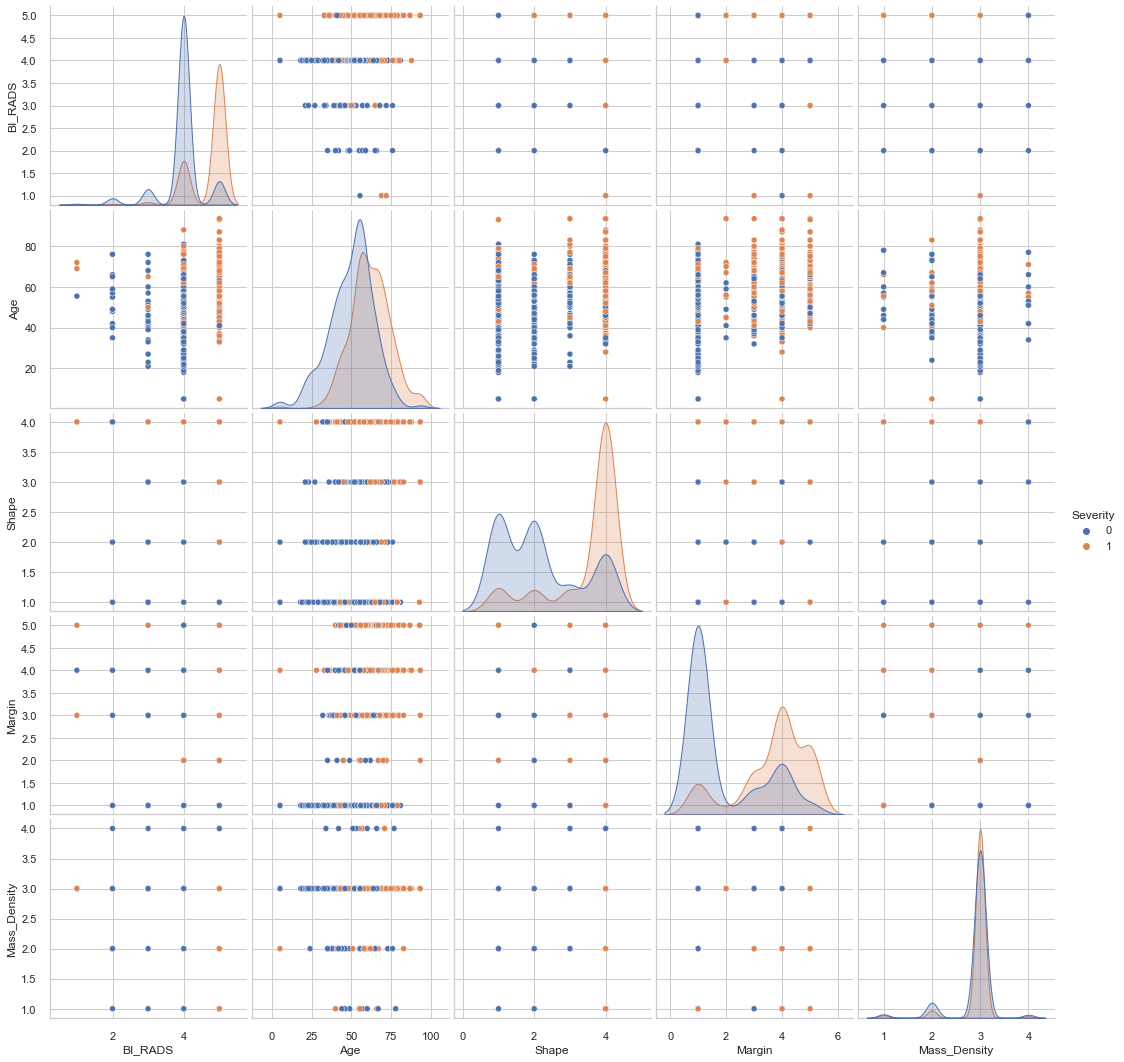

In [1008]:
#pairplot
sns.set_style("whitegrid");
sns.pairplot(data, hue="Severity", size=3);
plt.show()

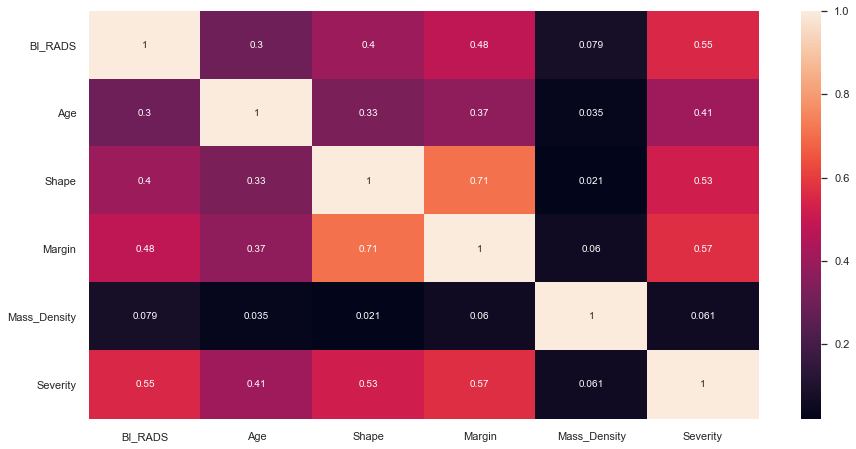

In [1009]:
#correlation
plt.figure(figsize=(15,7.5))
sns.heatmap(data.corr(),annot=True)
plt.show()
#There is a correlation between Margin and Shape 

In [1074]:
y = data['Severity']
X = data.drop(['Severity'],axis =1) #spliting the dependant and independant variables

In [1011]:
'''Fit Tree'''
#train test - split 

from sklearn.model_selection import train_test_split

In [1012]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=0)#split into 70-30 ratio

In [1013]:
from sklearn.tree import DecisionTreeClassifier #Using DT as it is good at handling non-linear data, as it is easy to read and interpret

In [1014]:
#fit tree on train data
#model
clf = DecisionTreeClassifier()

In [1015]:
#Fit Classifier model on train set 
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1016]:
#Predict/estimate_train  X_train
y_pred_train = clf.predict(X_train)

In [1017]:
#Predict/estimate_test  X_test
y_pred_test = clf.predict(X_test)


In [1018]:
#See the train 
from sklearn import tree

[Text(185.80936871227365, 211.4, 'X[0] <= 4.5\ngini = 0.497\nsamples = 567\nvalue = [306, 261]'),
 Text(116.83475855130786, 199.32, 'X[2] <= 3.5\ngini = 0.314\nsamples = 343\nvalue = [276, 67]'),
 Text(52.03883299798793, 187.24, 'X[1] <= 58.5\ngini = 0.194\nsamples = 257\nvalue = [229, 28]'),
 Text(20.209255533199197, 175.16, 'X[1] <= 40.5\ngini = 0.071\nsamples = 189\nvalue = [182, 7]'),
 Text(17.514688128772637, 163.07999999999998, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(22.903822937625755, 163.07999999999998, 'X[1] <= 45.5\ngini = 0.103\nsamples = 129\nvalue = [122, 7]'),
 Text(10.778269617706238, 151.0, 'X[2] <= 1.5\ngini = 0.225\nsamples = 31\nvalue = [27, 4]'),
 Text(5.389134808853119, 138.92000000000002, 'X[1] <= 41.5\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(2.6945674044265595, 126.84, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(8.083702213279679, 126.84, 'X[1] <= 42.5\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(5.389134808853119, 114.759

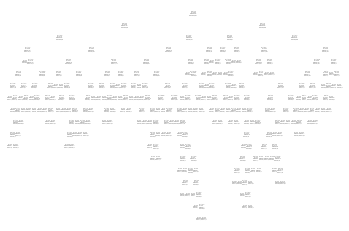

In [1019]:
tree.plot_tree(clf.fit(X_train, y_train))

In [1020]:
#Model has learnt unneccesaary things 
#Need to optimize

from sklearn.metrics import accuracy_score

In [1021]:
print(round(accuracy_score(y_train,y_pred_train), 2))

0.95


In [1022]:
print(round(accuracy_score(y_test,y_pred_test), 2))

0.77


In [1023]:
path = clf.cost_complexity_pruning_path(X_train, y_train) #pruning path

In [1024]:
path

{'ccp_alphas': array([0.00000000e+00, 0.00000000e+00, 6.29881582e-05, 7.12593305e-05,
        1.17577895e-04, 1.17577895e-04, 1.17577895e-04, 1.76366843e-04,
        1.98412698e-04, 2.33426704e-04, 2.35155791e-04, 2.35155791e-04,
        2.93944738e-04, 3.80510988e-04, 3.91926318e-04, 3.95489284e-04,
        4.17700795e-04, 4.70311581e-04, 4.70311581e-04, 4.97976969e-04,
        5.87889477e-04, 5.87889477e-04, 5.87889477e-04, 6.53210530e-04,
        6.63188414e-04, 6.78854473e-04, 7.05467372e-04, 8.46560847e-04,
        8.81834215e-04, 9.79815795e-04, 9.87654321e-04, 1.05820106e-03,
        1.07057768e-03, 1.09537084e-03, 1.12922491e-03, 1.17577895e-03,
        1.17577895e-03, 1.17577895e-03, 1.17577895e-03, 1.17577895e-03,
        1.17577895e-03, 1.21600297e-03, 1.25976316e-03, 1.27551020e-03,
        1.33413861e-03, 1.34374738e-03, 1.34374738e-03, 1.41093474e-03,
        1.44621279e-03, 1.46972369e-03, 1.56770527e-03, 1.59010106e-03,
        1.60333494e-03, 1.80286106e-03, 1.90644159

In [1025]:
alphas = path['ccp_alphas']

In [1026]:
alphas

array([0.00000000e+00, 0.00000000e+00, 6.29881582e-05, 7.12593305e-05,
       1.17577895e-04, 1.17577895e-04, 1.17577895e-04, 1.76366843e-04,
       1.98412698e-04, 2.33426704e-04, 2.35155791e-04, 2.35155791e-04,
       2.93944738e-04, 3.80510988e-04, 3.91926318e-04, 3.95489284e-04,
       4.17700795e-04, 4.70311581e-04, 4.70311581e-04, 4.97976969e-04,
       5.87889477e-04, 5.87889477e-04, 5.87889477e-04, 6.53210530e-04,
       6.63188414e-04, 6.78854473e-04, 7.05467372e-04, 8.46560847e-04,
       8.81834215e-04, 9.79815795e-04, 9.87654321e-04, 1.05820106e-03,
       1.07057768e-03, 1.09537084e-03, 1.12922491e-03, 1.17577895e-03,
       1.17577895e-03, 1.17577895e-03, 1.17577895e-03, 1.17577895e-03,
       1.17577895e-03, 1.21600297e-03, 1.25976316e-03, 1.27551020e-03,
       1.33413861e-03, 1.34374738e-03, 1.34374738e-03, 1.41093474e-03,
       1.44621279e-03, 1.46972369e-03, 1.56770527e-03, 1.59010106e-03,
       1.60333494e-03, 1.80286106e-03, 1.90644159e-03, 1.95963159e-03,
      

In [1027]:
#training for different values of ccp_alphas 
acrcy_train, acrcy_test = [],[]
for i in alphas:
    clf = DecisionTreeClassifier(ccp_alpha=i)    
    
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    acrcy_train.append(accuracy_score(y_train, y_pred_train))
    acrcy_test.append(accuracy_score(y_test,y_pred_test))

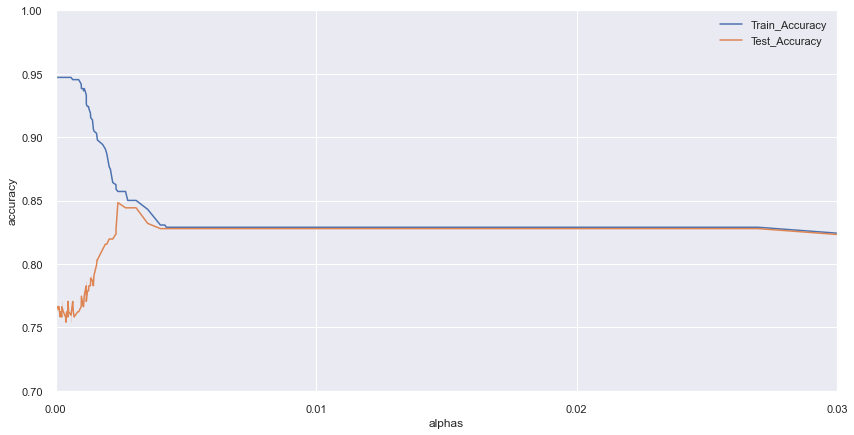

In [1028]:
# now we have scores
# lets, plot

sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y =acrcy_train, x = alphas, label = 'Train_Accuracy')
sns.lineplot(y =acrcy_test, x = alphas, label = 'Test_Accuracy')
plt.xticks(ticks=np.arange(0.00,0.05,0.01))
plt.xlabel('alphas')
plt.ylabel('accuracy')
plt.axis([0,0.03,0.7,1.0])
plt.show()

In [1029]:
#_________with ccp = 0.005
clf = DecisionTreeClassifier(ccp_alpha=0.005, random_state = 14)

In [1030]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.005, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=14, splitter='best')

In [1031]:
y_pred_train = clf.predict(X_train)

In [1032]:
y_pred_test = clf.predict(X_test)

In [1033]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_train,y_pred_train), 2))

0.83


In [1034]:
print(round(accuracy_score(y_test,y_pred_test), 2))

0.83


In [1035]:
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.005, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=14, splitter='best')

In [1036]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix

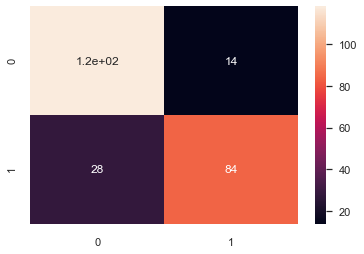

In [1037]:
confusion_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(confusion_matrix, annot = True)
plt.show()

In [1038]:
### Classification Report
from sklearn.metrics import classification_report

In [1039]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       132
           1       0.86      0.75      0.80       112

    accuracy                           0.83       244
   macro avg       0.83      0.82      0.82       244
weighted avg       0.83      0.83      0.83       244



In [1040]:
###########################  ROC AUC Curve 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
predictedProbability = clf.predict_proba(X_test)[:, 1]
fpr,tpr, thresholds = roc_curve(y_test, predictedProbability)
dff = pd.DataFrame(dict(fpr = fpr,tpr = tpr))
auc = auc(fpr,tpr)
print(auc)


0.8790584415584415


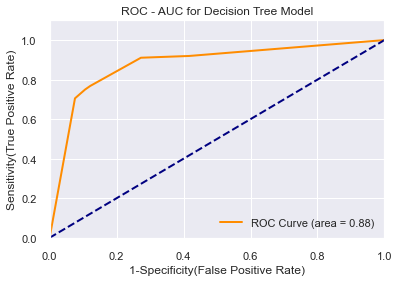

In [1041]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw =lw, label = 'ROC Curve (area = %0.2f)' %auc)
plt.plot([0,1],[0,1], color='navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title("ROC - AUC for Decision Tree Model")
plt.legend(loc = "lower right")
plt.show()


In [1042]:
#import the classifier
from sklearn.ensemble import RandomForestClassifier
#Create Classifier object 
#in our previous experiment, we found ccp_alphas = 0.005 has the best accuarcy 
clf_rf = RandomForestClassifier(n_estimators =100, ccp_alpha= 0.005, random_state = 14)


In [1043]:
#fit the classifier with x and y  data = train
mod_rf = clf_rf.fit(X_train, y_train)


In [1044]:
#Train Prediction 
y_train_pred = mod_rf.predict(X_train)

In [1045]:
#test Prediction 
y_test_pred = mod_rf.predict(X_test)

In [1046]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_train,y_train_pred), 2))


0.86


In [1047]:
print(round(accuracy_score(y_test,y_test_pred), 2))

0.85


In [1048]:
#_____________________________ Extract Feature Importance 
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': mod_rf.feature_importances_}).\
    sort_values('importance', ascending = False)

In [1049]:
fi.head()

,feature,importance
0,BI_RADS,0.416719
2,Shape,0.214833
3,Margin,0.214180
1,Age,0.139365
4,Mass_Density,0.014902


In [1050]:
#________________________________Grid Search 
from sklearn.model_selection import GridSearchCV

In [1051]:
param_grid = {'bootstrap': [True], 'ccp_alpha' : [0.005],
              'max_features': ['auto', 'log2'],
              'n_estimators': [25, 50, 100, 150, 200]}

In [1052]:
clf_rf = RandomForestClassifier(random_state = 14)

In [1053]:
g_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid, cv =5)

In [1054]:
gmod = g_search.fit(X_train, y_train)

In [1055]:
#Best Parameters
print(gmod.best_params_)


{'bootstrap': True, 'ccp_alpha': 0.005, 'max_features': 'auto', 'n_estimators': 25}


In [1056]:
param_grid1= {'bootstrap': [True], 'ccp_alpha': [0.005], 'max_features': ['auto'], 'n_estimators': [25]}


In [1057]:
clf_rf_Best = RandomForestClassifier(random_state = 14)

In [1058]:
g_search_Best = GridSearchCV(estimator = clf_rf_Best, param_grid = param_grid1, cv = 5)

In [1059]:
g_search_Best.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=14,
                                  

In [1060]:
y_pred_GS = g_search_Best.predict(X_test)

In [1061]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix

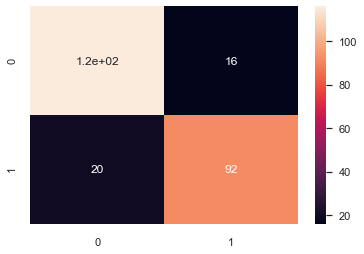

In [1062]:
confusion_matrix = confusion_matrix(y_test, y_pred_GS)
sns.heatmap(confusion_matrix, annot = True)
plt.show()

In [1063]:
### Classification Report
from sklearn.metrics import classification_report

In [1064]:
print(classification_report(y_test, y_pred_GS))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       132
           1       0.85      0.82      0.84       112

    accuracy                           0.85       244
   macro avg       0.85      0.85      0.85       244
weighted avg       0.85      0.85      0.85       244



In [1065]:
###########################  ROC AUC Curve 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [1066]:
predictedProbability_GS = g_search_Best.predict_proba(X_test)[:, 1]
fpr,tpr, thresholds = roc_curve(y_test, predictedProbability_GS)

In [1067]:
dff_GS = pd.DataFrame(dict(fpr = fpr,tpr = tpr))
auc_GS = auc(fpr,tpr)
auc_GS

0.8865665584415584

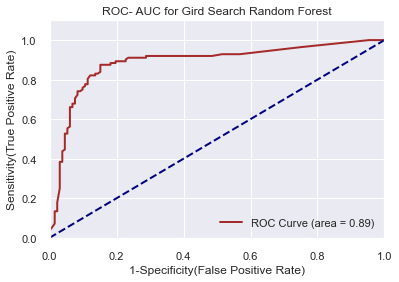

In [1068]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'brown',
         lw =lw, label = 'ROC Curve (area = %0.2f)' %auc_GS)
plt.plot([0,1],[0,1], color='navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title("ROC- AUC for Gird Search Random Forest")
plt.legend(loc = "lower right")
plt.show()

With the best ccp_alphas from the decision trees, we are able to randomforest classifier with an AUC = 0.89. Now we will train it on the entire train data and predict on the test data given to us

In [1075]:
g_search_Best.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=14,
                                  

In [1076]:
y_test = test_data['Severity']
X_test = test_data.drop(['Severity'],axis =1) #spliting the dependant and independant variables

In [1077]:
y_test_pred = g_search_Best.predict(X_test)

In [1079]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        78
           1       0.91      0.67      0.77        72

    accuracy                           0.81       150
   macro avg       0.83      0.80      0.80       150
weighted avg       0.83      0.81      0.80       150



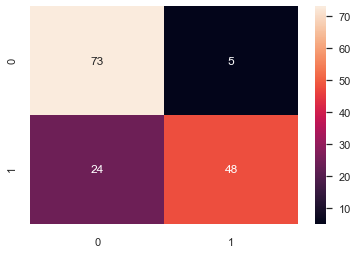

In [1081]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix, annot = True)
plt.show()

For Unseen test data the model is able to  predict with accuracy 81% it is misclassifying benign as malignat.

It is good that true negative is less so that we can refer for further tests to calssify as malignant

Using Pycaret

In [388]:
data.columns

Index(['Index', 'BI_RADS', 'Age', 'Shape', 'Margin', 'Mass_Density',
       'Severity'],
      dtype='object')

In [389]:
from pycaret.classification import *
s = setup(data, target = 'Severity', ignore_features = ['Index'])

,Description,Value
0,session_id,7015
1,Target,Severity
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(811, 7)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [390]:
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8146,0.8846,0.8079,0.8127,0.8094,0.6288,0.6303,0.5970
lda,Linear Discriminant Analysis,0.8093,0.8814,0.8118,0.8025,0.8063,0.6185,0.6199,0.0090
gbc,Gradient Boosting Classifier,0.8023,0.8669,0.7901,0.8047,0.7958,0.6042,0.6064,0.0310
ada,Ada Boost Classifier,0.8058,0.8648,0.7612,0.8301,0.7925,0.6106,0.6145,0.0330
lightgbm,Light Gradient Boosting Machine,0.7882,0.8560,0.7865,0.7841,0.7844,0.5762,0.5775,0.1500
rf,Random Forest Classifier,0.7759,0.8428,0.7832,0.7671,0.7732,0.5518,0.5547,0.0750
nb,Naive Bayes,0.7599,0.8318,0.7684,0.7504,0.7582,0.5199,0.5215,0.0070
knn,K Neighbors Classifier,0.7776,0.8261,0.7684,0.7747,0.7709,0.5547,0.5556,0.0090
et,Extra Trees Classifier,0.7477,0.8038,0.7292,0.7510,0.7390,0.4949,0.4963,0.0640
dt,Decision Tree Classifier,0.7372,0.7489,0.7078,0.7431,0.7232,0.4736,0.4759,0.0060


In [391]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8596,0.9397,0.8571,0.8571,0.8571,0.7192,0.7192
1,0.8596,0.8658,0.8214,0.8846,0.8519,0.7189,0.7206
2,0.7719,0.8676,0.7857,0.7586,0.7719,0.5440,0.5443
3,0.7719,0.8534,0.8214,0.7419,0.7797,0.5446,0.5476
4,0.8596,0.8590,0.8929,0.8333,0.8621,0.7196,0.7213
5,0.8246,0.9107,0.7500,0.8750,0.8077,0.6481,0.6547
6,0.8772,0.9372,0.9286,0.8387,0.8814,0.7548,0.7590
7,0.7857,0.8793,0.7407,0.8000,0.7692,0.5698,0.5713
8,0.8036,0.8972,0.7778,0.8077,0.7925,0.6061,0.6065
9,0.7321,0.8384,0.7037,0.7308,0.7170,0.4629,0.4632


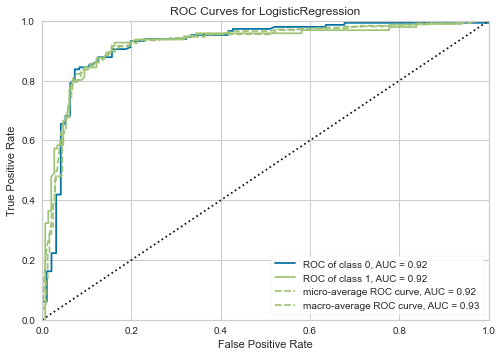

In [392]:
plot_model(tuned_best_model, plot = 'auc')

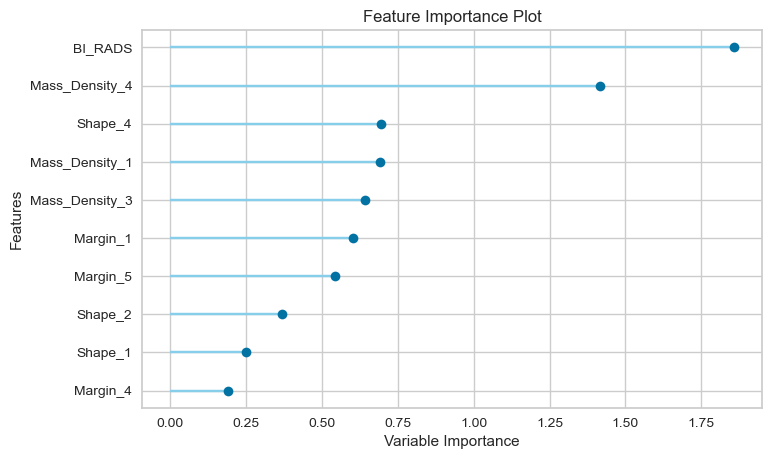

In [393]:
plot_model(tuned_best_model, plot = 'feature')

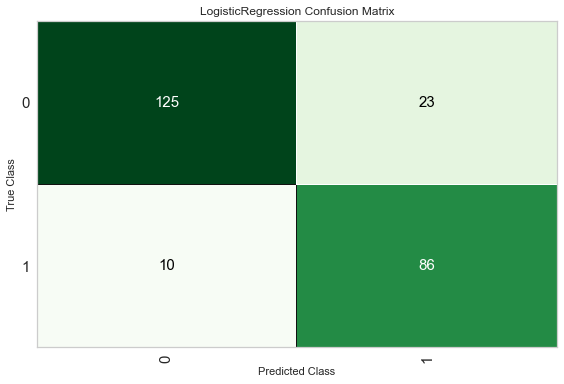

In [394]:
plot_model(tuned_best_model, plot = 'confusion_matrix')